In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Collection

In [2]:
data = pd.read_csv("application_train.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
dfObeject = data.select_dtypes(include='object')

In [5]:
dfObeject

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [6]:
dfObeject.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
dfObeject.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [9]:
nullPersen = pd.DataFrame({'persen': (data.isnull().sum()/(len(data)))*100})

In [10]:
nullPersen.sort_values(by='persen', ascending=False)

,persen
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


In [11]:
data.duplicated().sum()

0

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


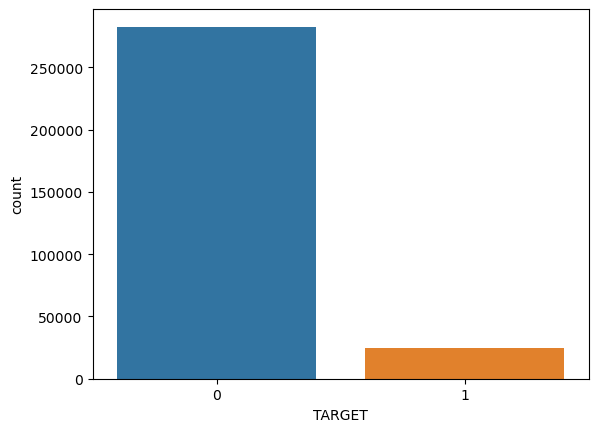

(24825, 122)
(282686, 122)


In [12]:
sns.countplot(data["TARGET"],orient="V")
plt.show()

diff=data[data["TARGET"]==1]  
other=data[data["TARGET"]==0]
print(diff.shape)  #printing shape of class  1
print(other.shape) #Printing shape of class 0

# Data Reduction

In [13]:
nullPersen.sort_values(by='persen', ascending=False).head(50)

,persen
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


In [14]:
selecPersen = nullPersen.query('persen < 10')

In [15]:
selecPersen.sort_values(by='persen', ascending=False).head(10)

,persen
NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,0.332021
EXT_SOURCE_2,0.214626
AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,0.003902
CNT_FAM_MEMBERS,0.000650
DAYS_LAST_PHONE_CHANGE,0.000325


In [16]:
selecPersen.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [17]:
dataUse = data[selecPersen.index]

In [18]:
dataUse

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dataUse = dataUse.drop(['SK_ID_CURR'], axis=1)

In [20]:
dataUse.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [21]:
dataUseObeject = dataUse.select_dtypes(include='object')

In [22]:
dataUseObeject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 10  ORGANIZATION_TYPE           307511 non-null  object
dtypes: object(11)
memory usage: 25.8+ MB


In [23]:
dataUseObeject.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

# Data Cleaning/Wrangling

In [24]:
dataUse = dataUse.dropna()

In [25]:
dataUse.isnull().sum()

TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 64, dtype: int64

In [26]:
dataUse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       304531 non-null  int64  
 1   NAME_CONTRACT_TYPE           304531 non-null  object 
 2   CODE_GENDER                  304531 non-null  object 
 3   FLAG_OWN_CAR                 304531 non-null  object 
 4   FLAG_OWN_REALTY              304531 non-null  object 
 5   CNT_CHILDREN                 304531 non-null  int64  
 6   AMT_INCOME_TOTAL             304531 non-null  float64
 7   AMT_CREDIT                   304531 non-null  float64
 8   AMT_ANNUITY                  304531 non-null  float64
 9   AMT_GOODS_PRICE              304531 non-null  float64
 10  NAME_TYPE_SUITE              304531 non-null  object 
 11  NAME_INCOME_TYPE             304531 non-null  object 
 12  NAME_EDUCATION_TYPE          304531 non-null  object 
 13 

In [27]:
dfNumeric = dataUse.select_dtypes(exclude=['object'])

In [28]:
dfNumericidx = pd.DataFrame({'nounik':dfNumeric.nunique()})

In [29]:
dfNumericidxf = dfNumericidx[dfNumericidx['nounik'] > 2]

In [30]:
dfNumericidxc = dfNumericidx[dfNumericidx['nounik'] <= 2]

In [31]:
dfNumericidxf

,nounik
CNT_CHILDREN,15
AMT_INCOME_TOTAL,2512
AMT_CREDIT,5585
AMT_ANNUITY,13652
AMT_GOODS_PRICE,985
REGION_POPULATION_RELATIVE,81
DAYS_BIRTH,17458
DAYS_EMPLOYED,12556
DAYS_REGISTRATION,15678
DAYS_ID_PUBLISH,6167


In [32]:
dfNumericidxc

,nounik
TARGET,2
FLAG_MOBIL,1
FLAG_EMP_PHONE,2
FLAG_WORK_PHONE,2
FLAG_CONT_MOBILE,2
FLAG_PHONE,2
FLAG_EMAIL,2
REG_REGION_NOT_LIVE_REGION,2
REG_REGION_NOT_WORK_REGION,2
LIVE_REGION_NOT_WORK_REGION,2


In [33]:
dfNumericidxf.index

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [34]:
dfNumeric = dfNumeric[dfNumericidxf.index]

In [35]:
dfNumeric

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,10,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0.622246,1.0,0.0,1.0,0.0,-828.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0.555912,0.0,0.0,0.0,0.0,-815.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0.650442,2.0,0.0,2.0,0.0,-617.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1.0,1,1,15,0.681632,0.0,0.0,0.0,0.0,-273.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,1.0,2,2,8,0.115992,0.0,0.0,0.0,0.0,0.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1.0,3,3,9,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,2.0,2,2,9,0.514163,0.0,0.0,0.0,0.0,-322.0


In [36]:
dataUseObeject = dataUse.select_dtypes(include=['object'])

In [37]:
df_encoded = pd.get_dummies(dataUse)

In [38]:
df_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = df_encoded.drop(['TARGET'], axis=1)
y = df_encoded[['TARGET']]

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
dataUse, y_smote = smote.fit_resample(X, y)

In [41]:
dataUse

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,0.018801,-9461,-637,-3648.000000,-2120,...,0,0,0,0,0,0,0,0,0,0
1,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,0.003541,-16765,-1188,-1186.000000,-291,...,0,0,0,0,0,0,0,0,0,0
2,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,0.010032,-19046,-225,-4260.000000,-2531,...,0,0,0,0,0,0,0,0,0,0
3,0,135000.000000,3.126825e+05,29686.500000,2.970000e+05,0.008019,-19005,-3039,-9833.000000,-2437,...,0,0,0,0,0,0,0,0,0,0
4,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,0.028663,-19932,-3038,-4311.000000,-3458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559723,0,116023.251592,3.186951e+05,21688.569392,2.420233e+05,0.025483,-11854,-1095,-3365.640894,-3433,...,0,0,0,0,0,0,0,0,0,0
559724,0,135000.000000,3.140550e+05,15551.798413,2.385000e+05,0.008252,-17491,-633,-8441.121231,-2963,...,0,0,0,0,0,0,0,0,0,0
559725,1,50012.742799,4.500000e+05,17540.810163,4.500000e+05,0.007362,-13900,-6628,-6433.917850,-3941,...,0,0,0,0,0,0,0,0,0,0
559726,1,127789.780242,2.438949e+05,24659.874237,2.438949e+05,0.026844,-12929,-1947,-752.497188,-664,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y_smote

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
559723,1
559724,1
559725,1
559726,1


In [43]:
dataUse['TARGET'] = y_smote.values

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\1692807422.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataUse['TARGET'] = y_smote.values


In [44]:
dataUse

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
0,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,0.018801,-9461,-637,-3648.000000,-2120,...,0,0,0,0,0,0,0,0,0,1
1,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,0.003541,-16765,-1188,-1186.000000,-291,...,0,0,0,0,0,0,0,0,0,0
2,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,0.010032,-19046,-225,-4260.000000,-2531,...,0,0,0,0,0,0,0,0,0,0
3,0,135000.000000,3.126825e+05,29686.500000,2.970000e+05,0.008019,-19005,-3039,-9833.000000,-2437,...,0,0,0,0,0,0,0,0,0,0
4,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,0.028663,-19932,-3038,-4311.000000,-3458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559723,0,116023.251592,3.186951e+05,21688.569392,2.420233e+05,0.025483,-11854,-1095,-3365.640894,-3433,...,0,0,0,0,0,0,0,0,0,1
559724,0,135000.000000,3.140550e+05,15551.798413,2.385000e+05,0.008252,-17491,-633,-8441.121231,-2963,...,0,0,0,0,0,0,0,0,0,1
559725,1,50012.742799,4.500000e+05,17540.810163,4.500000e+05,0.007362,-13900,-6628,-6433.917850,-3941,...,0,0,0,0,0,0,0,0,0,1
559726,1,127789.780242,2.438949e+05,24659.874237,2.438949e+05,0.026844,-12929,-1947,-752.497188,-664,...,0,0,0,0,0,0,0,0,0,1


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


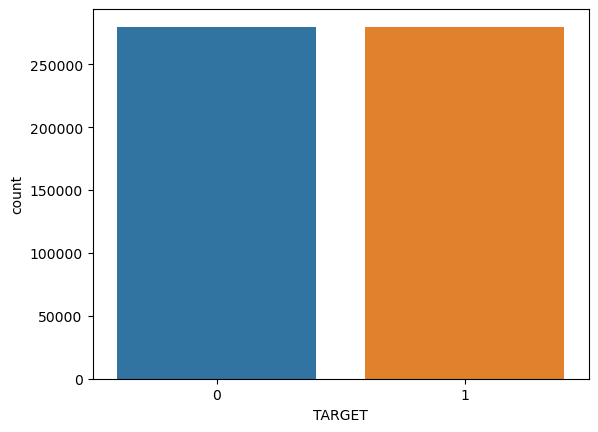

(279864, 158)
(279864, 158)


In [45]:
sns.countplot(dataUse["TARGET"],orient="V")
plt.show()

diff=dataUse[dataUse["TARGET"]==1]  
other=dataUse[dataUse["TARGET"]==0]
print(diff.shape)  #printing shape of class  1
print(other.shape) #Printing shape of class 0

In [46]:
dataUse = dataUse.sample(frac=0.2, replace=True, random_state=42)

In [47]:
dataUse

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
121958,0,225000.000000,8.625600e+05,25218.000000,7.200000e+05,0.018801,-13574,-2791,-7695.000000,-4575,...,0,0,0,0,0,0,0,0,0,0
131932,0,157500.000000,1.223010e+06,51948.000000,1.125000e+06,0.022625,-11642,-3034,-5569.000000,-4128,...,0,0,0,0,0,0,0,0,0,0
365838,0,112500.000000,1.506049e+05,10312.692708,1.350000e+05,0.014845,-8883,-1870,-6279.816056,-1306,...,0,0,0,0,0,0,0,0,0,1
259178,2,360000.000000,5.925600e+05,35937.000000,4.500000e+05,0.009630,-12373,-2888,-6149.000000,-4652,...,0,0,0,0,0,0,0,0,0,0
110268,0,270000.000000,1.170000e+06,37872.000000,1.170000e+06,0.015221,-14131,-1226,-1403.000000,-2484,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317406,0,161624.965846,5.323162e+05,29589.798157,4.042499e+05,0.033252,-12002,-771,-2015.571546,-4495,...,0,0,0,0,0,0,0,0,0,1
180941,0,157500.000000,7.819200e+05,28215.000000,6.750000e+05,0.018801,-20001,-1250,-10281.000000,-3199,...,0,0,0,0,0,0,0,0,0,0
546113,1,112920.707940,6.400800e+05,29970.000000,4.500000e+05,0.014399,-15905,-1086,-1346.990589,-448,...,0,0,0,0,0,0,0,0,0,1
118626,0,360000.000000,1.078200e+06,31653.000000,9.000000e+05,0.009657,-18533,-3364,-11077.000000,-2081,...,0,0,0,0,0,0,0,0,0,0


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


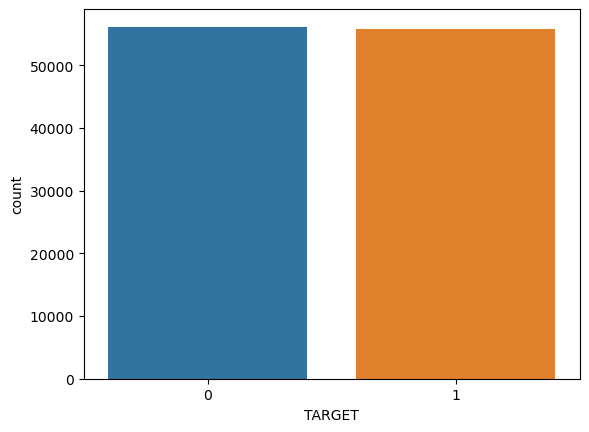

(55821, 158)
(56125, 158)


In [48]:
sns.countplot(dataUse["TARGET"],orient="V")
plt.show()

diff=dataUse[dataUse["TARGET"]==1]  
other=dataUse[dataUse["TARGET"]==0]
print(diff.shape)  #printing shape of class  1
print(other.shape) #Printing shape of class 0

# Data Pre-processing

## Feature Selection for Numeric

In [49]:
dfNumeric.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [50]:
dfNumeric = dataUse[dfNumeric.columns]

In [51]:
dfNumeric

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
121958,0,225000.000000,8.625600e+05,25218.000000,7.200000e+05,0.018801,-13574,-2791,-7695.000000,-4575,2.000000,2,2,6,0.557482,0.000000,0.0,0.000000,0.0,-1331.000000
131932,0,157500.000000,1.223010e+06,51948.000000,1.125000e+06,0.022625,-11642,-3034,-5569.000000,-4128,2.000000,2,2,17,0.740771,2.000000,0.0,2.000000,0.0,-1582.000000
365838,0,112500.000000,1.506049e+05,10312.692708,1.350000e+05,0.014845,-8883,-1870,-6279.816056,-1306,1.502793,2,2,7,0.118384,0.000000,0.0,0.000000,0.0,-1406.664876
259178,2,360000.000000,5.925600e+05,35937.000000,4.500000e+05,0.009630,-12373,-2888,-6149.000000,-4652,4.000000,2,2,10,0.653686,0.000000,0.0,0.000000,0.0,-1050.000000
110268,0,270000.000000,1.170000e+06,37872.000000,1.170000e+06,0.015221,-14131,-1226,-1403.000000,-2484,2.000000,2,2,10,0.658738,1.000000,0.0,1.000000,0.0,-1750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317406,0,161624.965846,5.323162e+05,29589.798157,4.042499e+05,0.033252,-12002,-771,-2015.571546,-4495,1.000000,2,2,11,0.060268,0.083341,0.0,0.083341,0.0,-276.831041
180941,0,157500.000000,7.819200e+05,28215.000000,6.750000e+05,0.018801,-20001,-1250,-10281.000000,-3199,2.000000,2,2,12,0.384235,3.000000,2.0,3.000000,2.0,-2618.000000
546113,1,112920.707940,6.400800e+05,29970.000000,4.500000e+05,0.014399,-15905,-1086,-1346.990589,-448,3.467453,2,2,12,0.314910,2.532547,0.0,2.065093,0.0,-550.925495
118626,0,360000.000000,1.078200e+06,31653.000000,9.000000e+05,0.009657,-18533,-3364,-11077.000000,-2081,2.000000,2,2,10,0.528579,2.000000,0.0,2.000000,0.0,-930.000000


In [52]:
dfNumeric['TARGET'] = dataUse['TARGET'].values

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\111570732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNumeric['TARGET'] = dataUse['TARGET'].values


In [53]:
dfNumeric_corr = dfNumeric.corr()
dfNumeric_corr[np.abs(dfNumeric_corr)<.2] = 0

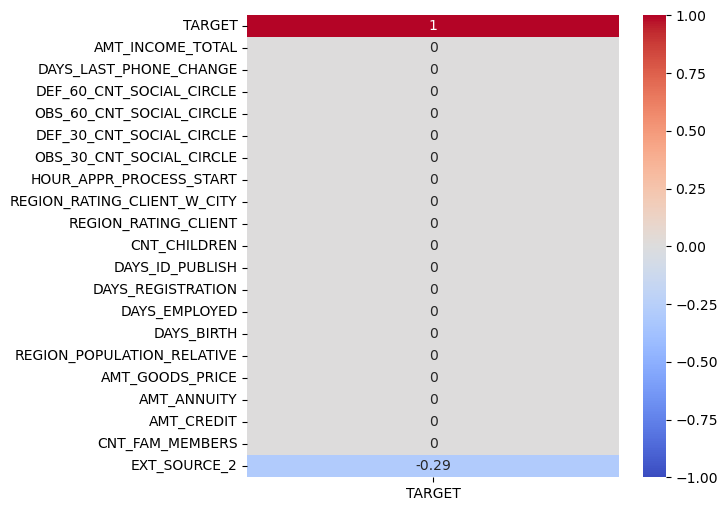

In [54]:
plt.figure(figsize=(6,6))
sns.heatmap(dfNumeric_corr[['TARGET']].sort_values(by=['TARGET'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [55]:
X = dfNumeric.drop(['TARGET'], axis=1).values
y = dfNumeric[['TARGET']].values.ravel()

In [56]:
X.shape

(111946, 20)

In [57]:
y.shape

(111946,)

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
# Create a GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Print the selected features
print(rfe.support_)

[ True False False False False  True False False False False  True  True
 False  True  True  True  True  True False  True]


In [60]:
dftemp = dfNumeric.drop(['TARGET'], axis=1)

In [61]:
print(dftemp.columns[rfe.support_])

Index(['CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [62]:
numUse = dfNumeric[dftemp.columns[rfe.support_]]

In [63]:
numUse

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
121958,0,0.018801,2.000000,2,6,0.557482,0.000000,0.0,0.000000,-1331.000000
131932,0,0.022625,2.000000,2,17,0.740771,2.000000,0.0,2.000000,-1582.000000
365838,0,0.014845,1.502793,2,7,0.118384,0.000000,0.0,0.000000,-1406.664876
259178,2,0.009630,4.000000,2,10,0.653686,0.000000,0.0,0.000000,-1050.000000
110268,0,0.015221,2.000000,2,10,0.658738,1.000000,0.0,1.000000,-1750.000000
...,...,...,...,...,...,...,...,...,...,...
317406,0,0.033252,1.000000,2,11,0.060268,0.083341,0.0,0.083341,-276.831041
180941,0,0.018801,2.000000,2,12,0.384235,3.000000,2.0,3.000000,-2618.000000
546113,1,0.014399,3.467453,2,12,0.314910,2.532547,0.0,2.065093,-550.925495
118626,0,0.009657,2.000000,2,10,0.528579,2.000000,0.0,2.000000,-930.000000


In [64]:
numIdx = numUse.columns

## Feature Selection for Categorical

In [65]:
dataUseObeject = dataUse.loc[:, ~dataUse.columns.isin(dfNumeric.columns)]

In [66]:
dataUseObeject.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111946 entries, 121958 to 258195
Columns: 137 entries, FLAG_MOBIL to ORGANIZATION_TYPE_XNA
dtypes: int64(32), uint8(105)
memory usage: 39.4 MB


In [67]:
dataUseObeject

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
121958,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365838,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259178,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110268,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317406,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180941,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546113,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118626,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
dataUseObeject.nunique()

FLAG_MOBIL                             1
FLAG_EMP_PHONE                         2
FLAG_WORK_PHONE                        2
FLAG_CONT_MOBILE                       2
FLAG_PHONE                             2
                                      ..
ORGANIZATION_TYPE_Transport: type 2    2
ORGANIZATION_TYPE_Transport: type 3    2
ORGANIZATION_TYPE_Transport: type 4    2
ORGANIZATION_TYPE_University           2
ORGANIZATION_TYPE_XNA                  2
Length: 137, dtype: int64

In [69]:
X = dataUseObeject.values

In [70]:
X.shape

(111946, 137)

In [71]:
y.shape

(111946,)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=42)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

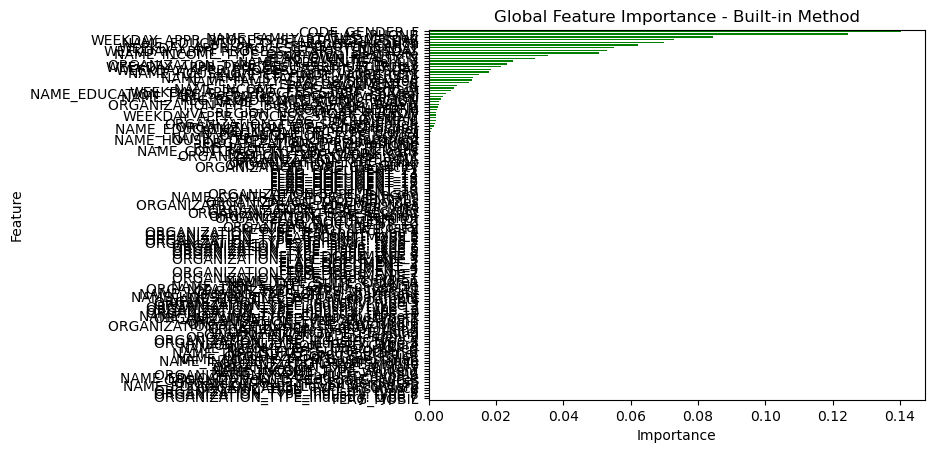

In [74]:
global_importances = pd.Series(rf.feature_importances_, index=dataUseObeject.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [75]:
importance = rf.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00010
Feature: 2, Score: 0.00266
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.12457
Feature: 5, Score: 0.00211
Feature: 6, Score: 0.00006
Feature: 7, Score: 0.00375
Feature: 8, Score: 0.00226
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.01494
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00208
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01204
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00004
Feature: 34, Score: 0.14033
Feature: 35, Score: 0.00233
Fe

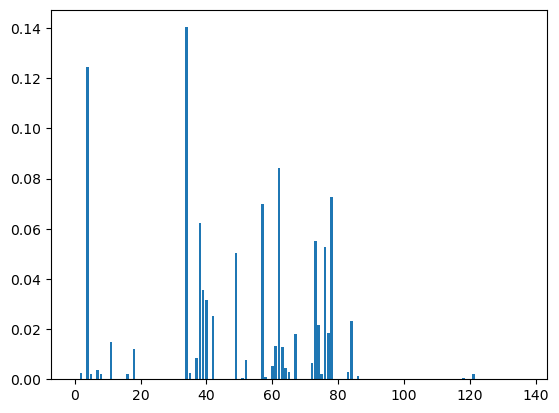

In [76]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

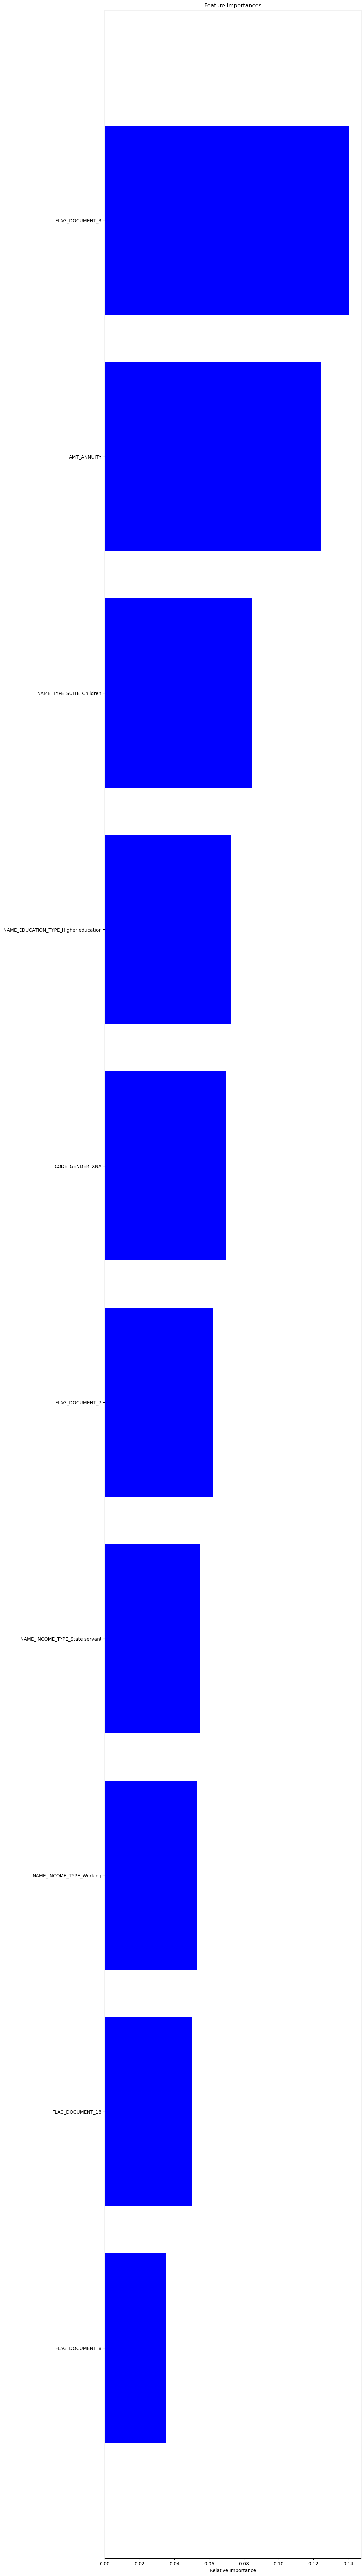

In [77]:
features = df_encoded.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(10,100))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [78]:
global_importances.sort_values(ascending=True, inplace=True)

In [79]:
df_import = pd.DataFrame({'penting' : global_importances})

In [80]:
df_import.sort_values('penting',ascending=False).head(20)

,penting
CODE_GENDER_F,0.140327
FLAG_PHONE,0.124569
NAME_FAMILY_STATUS_Married,0.084357
WEEKDAY_APPR_PROCESS_START_WEDNESDAY,0.072770
NAME_EDUCATION_TYPE_Higher education,0.069879
FLAG_OWN_CAR_Y,0.062294
WEEKDAY_APPR_PROCESS_START_MONDAY,0.055032
WEEKDAY_APPR_PROCESS_START_THURSDAY,0.052800
NAME_INCOME_TYPE_Commercial associate,0.050496
FLAG_OWN_REALTY_N,0.035459


In [81]:
catUse = df_import.sort_values('penting',ascending=False).head(20)

In [82]:
catUse.index

Index(['CODE_GENDER_F', 'FLAG_PHONE', 'NAME_FAMILY_STATUS_Married',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
       'NAME_EDUCATION_TYPE_Higher education', 'FLAG_OWN_CAR_Y',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'NAME_INCOME_TYPE_Commercial associate', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_TYPE_SUITE_Family',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'NAME_HOUSING_TYPE_House / apartment', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Separated',
       'FLAG_DOCUMENT_8'],
      dtype='object')

In [83]:
dfCatUse = dataUseObeject[catUse.index]

In [84]:
dfCatUse

,CODE_GENDER_F,FLAG_PHONE,NAME_FAMILY_STATUS_Married,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_EDUCATION_TYPE_Higher education,FLAG_OWN_CAR_Y,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,NAME_INCOME_TYPE_Commercial associate,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,ORGANIZATION_TYPE_Business Entity Type 3,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,NAME_HOUSING_TYPE_House / apartment,LIVE_CITY_NOT_WORK_CITY,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,FLAG_DOCUMENT_8
121958,0,1,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0
131932,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1
365838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
259178,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0
110268,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317406,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
180941,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
546113,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
118626,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [85]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [86]:
robust = RobustScaler()
norm = MinMaxScaler()

In [87]:
numUse[catUse.index] = dfCatUse.values

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\959117047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numUse[catUse.index] = dfCatUse.values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\959117047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numUse[catUse.index] = dfCatUse.values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5768\959117047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [88]:
numUse

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,...,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,ORGANIZATION_TYPE_Business Entity Type 3,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,NAME_HOUSING_TYPE_House / apartment,LIVE_CITY_NOT_WORK_CITY,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,FLAG_DOCUMENT_8
121958,0,0.018801,2.000000,2,6,0.557482,0.000000,0.0,0.000000,-1331.000000,...,1,1,0,1,0,1,0,0,0,0
131932,0,0.022625,2.000000,2,17,0.740771,2.000000,0.0,2.000000,-1582.000000,...,0,0,0,0,0,1,0,0,0,1
365838,0,0.014845,1.502793,2,7,0.118384,0.000000,0.0,0.000000,-1406.664876,...,0,0,0,0,0,1,1,0,0,0
259178,2,0.009630,4.000000,2,10,0.653686,0.000000,0.0,0.000000,-1050.000000,...,1,0,1,0,0,1,0,0,0,0
110268,0,0.015221,2.000000,2,10,0.658738,1.000000,0.0,1.000000,-1750.000000,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317406,0,0.033252,1.000000,2,11,0.060268,0.083341,0.0,0.083341,-276.831041,...,0,0,0,0,0,1,0,0,0,0
180941,0,0.018801,2.000000,2,12,0.384235,3.000000,2.0,3.000000,-2618.000000,...,1,0,0,0,1,1,0,1,0,0
546113,1,0.014399,3.467453,2,12,0.314910,2.532547,0.0,2.065093,-550.925495,...,1,0,0,0,0,1,0,0,0,0
118626,0,0.009657,2.000000,2,10,0.528579,2.000000,0.0,2.000000,-930.000000,...,1,0,0,0,0,1,0,0,0,0


In [89]:
X = numUse.values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [92]:
X_train = robust.fit_transform(X_train)
X_test = robust.fit_transform(X_test)

In [93]:
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

In [94]:
X_train.shape

(100751, 30)

# Training and Evaluating

In [95]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('val_accuracy') > 0.92: 
                print("\nReached 92% accuracy so cancelling training!") 
                # Stop training once the above condition is met
                self.model.stop_training = True

In [96]:
mycallback = myCallback()

In [97]:
device_name="/GPU:0"
with tf.device(device_name):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, input_shape=[30], activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units=256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units=256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,verbose=1, callbacks=mycallback)

Epoch 1/10
3149/3149 [==============================] - 70s 22ms/step - loss: 0.2808 - accuracy: 0.8896 - val_loss: 0.6053 - val_accuracy: 0.7940
Epoch 2/10
3149/3149 [==============================] - 91s 29ms/step - loss: 0.2416 - accuracy: 0.9065 - val_loss: 2.3613 - val_accuracy: 0.6647
Epoch 3/10
3149/3149 [==============================] - 90s 29ms/step - loss: 0.2325 - accuracy: 0.9109 - val_loss: 3.7618 - val_accuracy: 0.6498
Epoch 4/10
3149/3149 [==============================] - 90s 29ms/step - loss: 0.2270 - accuracy: 0.9137 - val_loss: 3.5237 - val_accuracy: 0.6526
Epoch 5/10
3149/3149 [==============================] - 90s 29ms/step - loss: 0.2227 - accuracy: 0.9156 - val_loss: 4.8420 - val_accuracy: 0.6431
Epoch 6/10
3149/3149 [==============================] - 90s 29ms/step - loss: 0.2199 - accuracy: 0.9173 - val_loss: 5.0934 - val_accuracy: 0.6360
Epoch 7/10
3149/3149 [==============================] - 82s 26ms/step - loss: 0.2223 - accuracy: 0.9156 - val_loss: 4.3498 -

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [99]:
estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
...     ('dtc', DecisionTreeClassifier(max_depth=5, random_state=42))
... ]

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [101]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.8775346136668155

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [103]:
clf1 = GradientBoostingClassifier(n_estimators=100,max_depth=1, random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")

In [104]:
eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('ac', clf4)],
...     voting='hard')

In [105]:
eclf.fit(X_train, y_train).score(X_test, y_test)

0.9095131755247878

In [106]:
from sklearn.ensemble import BaggingClassifier

In [107]:
bagging = BaggingClassifier(GradientBoostingClassifier(n_estimators=100,max_depth=1, random_state=42),
...                             max_samples=0.5, max_features=0.5)

In [108]:
bagging.fit(X_train, y_train).score(X_test, y_test)

0.8848593121929432

In [109]:
y_pred = np.round(model.predict(X_test))

350/350 [==============================] - 3s 7ms/step


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.32      0.46      5596
           1       0.58      0.95      0.72      5599

    accuracy                           0.63     11195
   macro avg       0.72      0.63      0.59     11195
weighted avg       0.72      0.63      0.59     11195



In [112]:
y_pred = eclf.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5596
           1       0.94      0.87      0.91      5599

    accuracy                           0.91     11195
   macro avg       0.91      0.91      0.91     11195
weighted avg       0.91      0.91      0.91     11195

